In [1]:
# !/usr/bin/env python3
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics

In [2]:
digits = datasets.load_digits()

In [3]:
images_and_labels = list(zip(digits.images, digits.target))

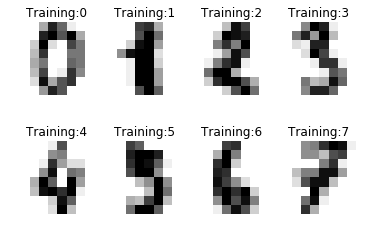

In [5]:
for index, (image, label) in enumerate(images_and_labels[:8]):
    plt.subplot(2,4,index+1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training:{}'.format(label))

In [7]:
n_samples = len(digits.images)
n_samples

1797

In [8]:
data = digits.images.reshape(n_samples, -1)

In [9]:
classifier = svm.SVC(gamma=0.001)

In [10]:
classifier.fit(data[:n_samples//2], digits.target[:n_samples//2])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [11]:
predict = classifier.predict(data[n_samples//2:])

In [12]:
expected = digits.target[n_samples//2:]


In [15]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predict)))

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       1.00      0.99      0.99        88
          1       0.99      0.97      0.98        91
          2       0.99      0.99      0.99        86
          3       0.98      0.87      0.92        91
          4       0.99      0.96      0.97        92
          5       0.95      0.97      0.96        91
          6       0.99      0.99      0.99        91
          7       0.96      0.99      0.97        89
          8       0.94      1.00      0.97        88
          9       0.93      0.98      0.95        92

avg / total       0.97      0.97      0.97       899




In [17]:
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predict))

Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


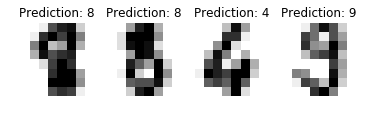

In [19]:
images_and_predictions = list(zip(digits.images[n_samples // 2:], predict))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()